In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc

In [38]:
df0 = pd.read_csv('train_modified.csv')

In [39]:
df0

Unnamed: 0  index label   x0   x1   x2   x3   x4   x5   x6  ...  x375  \
0              0     10    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1              1     12    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2              2     14    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3              3     35   yes  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4              4     41    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
...          ...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
1326        1326  30963    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1327        1327  30993    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1328        1328  31012    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1329        1329  31047    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1330        1330  31152    no  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

      x376  x377  x378  x379  x380  x381  x382  x383  x384  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1326   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1327   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1328   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1329   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1330   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1331 rows x 388 columns]

## ML models

In [43]:
X = df0.drop(['label', 'Unnamed: 0', 'index'], axis=1)
y = df0['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### SVM

In [44]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
y_pred_SVM = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_SVM))

Accuracy: 0.8614232209737828


In [46]:
print(classification_report(y_test, y_pred_SVM))#, target_names=le.classes_))

              precision    recall  f1-score   support

          no       0.86      1.00      0.93       230
         yes       0.00      0.00      0.00        37

    accuracy                           0.86       267
   macro avg       0.43      0.50      0.46       267
weighted avg       0.74      0.86      0.80       267



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Naive Bayes

In [47]:
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)

In [48]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))

Accuracy: 0.5056179775280899


In [49]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

          no       0.86      0.51      0.64       230
         yes       0.14      0.49      0.21        37

    accuracy                           0.51       267
   macro avg       0.50      0.50      0.43       267
weighted avg       0.76      0.51      0.58       267



#### Random Forest

In [55]:
df = df0.replace({'label': {'no': 1, 'yes': 0}})

X = df.drop(['label', 'Unnamed: 0', 'index'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [56]:
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)

In [57]:
print(accuracy_score(y_test, y_pred_RF.round()))

0.8052434456928839


In [59]:
print(classification_report(y_test, y_pred_RF.round()))

              precision    recall  f1-score   support

           0       0.33      0.08      0.13        48
           1       0.83      0.96      0.89       219

    accuracy                           0.81       267
   macro avg       0.58      0.52      0.51       267
weighted avg       0.74      0.81      0.75       267



### Oversampling data

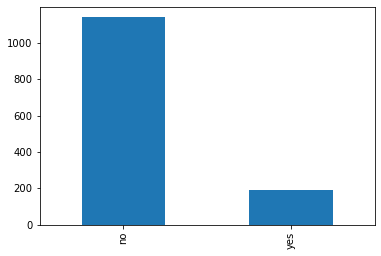

In [60]:
df0['label'].value_counts().plot.bar()
plt.show()

In [61]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority') # random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [62]:
print(y.value_counts())
print(y_resampled.value_counts())

1    1140
0     191
Name: label, dtype: int64
1    1140
0    1140
Name: label, dtype: int64


In [63]:
X_train_overs, X_test_overs, y_train_overs, y_test_overs = train_test_split(X_resampled, y_resampled, test_size = 0.20)

In [64]:
# Random Forest
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train_overs, y_train_overs)
y_pred_RF_overs = rf.predict(X_test_overs)

In [65]:
print(accuracy_score(y_test_overs, y_pred_RF_overs.round()))

0.7083333333333334


In [67]:
print(classification_report(y_test_overs, y_pred_RF_overs.round() ))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       229
           1       0.68      0.79      0.73       227

    accuracy                           0.71       456
   macro avg       0.71      0.71      0.71       456
weighted avg       0.71      0.71      0.71       456



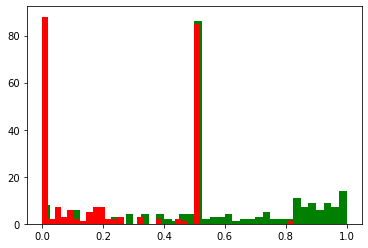

In [82]:
plt.hist(y_pred_RF_overs[y_test_overs == 1], bins=40, color='green')
plt.hist(y_pred_RF_overs[y_test_overs == 0], bins=40, color='red')
plt.show()

### Predicting affinity of new samples

In [102]:
df_test = pd.read_csv('test.csv')
df_test

Unnamed: 0  Index First Name Last Name  100 greatest  100 influential  \
0               0      0      Jason  Cohenour           0.0              0.0   
1               1      1     Deepak    Chopra           0.0              0.0   
2               2      2        Guy     Gecht           0.0              0.0   
3               3      3      Peter    Aquino           0.0              0.0   
4               4      4      Clive  Meanwell           0.0              0.0   
...           ...    ...        ...       ...           ...              ...   
29848       31179  31179    Patrick     Smith           0.0              0.0   
29849       31180  31180       John  Williams           0.0              0.0   
29850       31181  31181     Sender        S.           0.0              0.0   
29851       31182  31182        Joe    Little           0.0              0.0   
29852       31183  31183       Brad   Pinchuk           0.0              0.0   

       19 pandemic  1946 american  1947 american  1948 american  ...  \
0              0.0            0.0            0.0            0.0  ...   
1              0.0            0.0            0.0            0.0  ...   
2              0.0            0.0            0.0            0.0  ...   
3              0.0            0.0            0.0            0.0  ...   
4              0.0            0.0            0.0            0.0  ...   
...            ...            ...            ...            ...  ...   
29848          0.0            0.0            0.0            0.0  ...   
29849          0.0            0.0            0.0            0.0  ...   
29850          0.0            0.0            0.0            0.0  ...   
29851          0.0            0.0            0.0            0.0  ...   
29852          0.0            0.0            0.0            0.0  ...   

       won golden  won grammy  world champion  world championship  \
0             0.0         0.0             0.0                 0.0   
1             0.0         0.0             0.0                 0.0   
2             0.0         0.0             0.0                 0.0   
3             0.0         0.0             0.0                 0.0   
4             0.0         0.0             0.0                 0.0   
...           ...         ...             ...                 ...   
29848         0.0         0.0             0.0                 0.0   
29849         0.0         0.0             0.0                 0.0   
29850         0.0         0.0             0.0                 0.0   
29851         0.0         0.0             0.0                 0.0   
29852         0.0         0.0             0.0                 0.0   

       world championships  world series  writer producer  year award  \
0                      0.0           0.0              0.0         0.0   
1                      0.0           0.0              0.0         0.0   
2                      0.0           0.0              0.0         0.0   
3                      0.0           0.0              0.0         0.0   
4                      0.0           0.0              0.0         0.0   
...                    ...           ...              ...         ...   
29848                  0.0           0.0              0.0         0.0   
29849                  0.0           0.0              0.0         0.0   
29850                  0.0           0.0              0.0         0.0   
29851                  0.0           0.0              0.0         0.0   
29852                  0.0           0.0              0.0         0.0   

       years old  younger brother  
0            0.0              0.0  
1            0.0              0.0  
2            0.0              0.0  
3            0.0              0.0  
4            0.0              0.0  
...          ...              ...  
29848        0.0              0.0  
29849        0.0              0.0  
29850        0.0              0.0  
29851        0.0              0.0  
29852        0.0              0.0  

[29853 rows x 389 columns]

In [103]:
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [104]:
df_test = df_test.drop(['First Name', 'Last Name'], axis=1)

In [106]:
cols = ['Index'] + ['x'+str(num) for num in range(385)]
df_test.columns = cols
df_test_model = df_test.drop(['Index'], axis=1)
df_test_model

x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  x375  x376  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
29848  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
29849  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
29850  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
29851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
29852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

       x377  x378  x379  x380  x381  x382  x383  x384  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...  
29848   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29849   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29850   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29851   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29852   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[29853 rows x 385 columns]

In [107]:
predicted = rf.predict(df_test_model)

In [116]:
test_predictions = pd.DataFrame(predicted)
test_predictions.columns = ['label']
test_predictions['Index'] = df_test.Index
test_predictions

label  Index
0      0.975399      0
1      0.506750      1
2      0.506750      2
3      0.677343      3
4      0.506750      4
...         ...    ...
29848  0.582441  31179
29849  0.823795  31180
29850  0.506750  31181
29851  0.506750  31182
29852  0.400291  31183

[29853 rows x 2 columns]

In [117]:
test_predictions.to_csv('predictions.csv')